# scikit-learn 中使用多项式回归 和pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y =4*x**2 + 3*x +5+ np.random.normal(0,3,size=100)

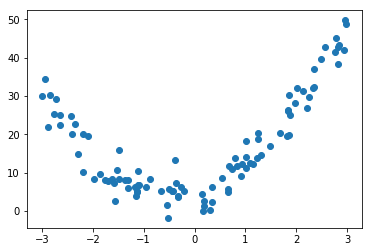

In [33]:
plt.scatter(X,y)

plt.show()

In [34]:
#数据预处理         多项式特征
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly = PolynomialFeatures()
poly.fit(X)
X_pridect=poly.transform(X)

In [36]:
X_pridect.shape

(100, 3)

In [37]:
#  (X0)1     X     X2
X_pridect[:3,:]

array([[ 1.        , -2.8824374 ,  8.30844536],
       [ 1.        ,  2.21216312,  4.89366568],
       [ 1.        , -1.17642425,  1.38397403]])

In [38]:
X[:3]

array([[-2.8824374 ],
       [ 2.21216312],
       [-1.17642425]])

In [39]:
from sklearn.linear_model import  LinearRegression

In [40]:
lin = LinearRegression()
lin.fit(X_pridect,y)
y_pridect = lin.predict(X_pridect)

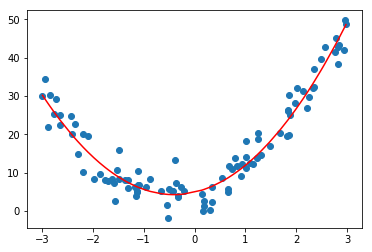

In [41]:
plt.scatter(X,y)
plt.plot(np.sort(x),y_pridect[np.argsort(x)],color='r')
plt.show()

In [42]:
lin.intercept_

4.8913412604671027

In [43]:
lin.coef_

array([ 0.        ,  3.14414024,  3.88070251])

In [45]:
x1 = np.arange(1,11).reshape(-1,2)

In [46]:
#degreee 代表的是我们的  几次幂
poly1 = PolynomialFeatures(degree=2)

In [47]:
poly1.fit(x1)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [48]:
x2 =poly1.transform(x1)

In [50]:
# x0   X[1]    x[2]      x[1]2   x[1]x[2] x[2]2
x2

array([[   1.,    1.,    2.,    1.,    2.,    4.],
       [   1.,    3.,    4.,    9.,   12.,   16.],
       [   1.,    5.,    6.,   25.,   30.,   36.],
       [   1.,    7.,    8.,   49.,   56.,   64.],
       [   1.,    9.,   10.,   81.,   90.,  100.]])

In [51]:
poly3 =PolynomialFeatures(degree=3)

In [52]:
poly3.fit(x1)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [53]:
x3 = poly3.transform(x1)

In [54]:
x3

array([[    1.,     1.,     2.,     1.,     2.,     4.,     1.,     2.,
            4.,     8.],
       [    1.,     3.,     4.,     9.,    12.,    16.,    27.,    36.,
           48.,    64.],
       [    1.,     5.,     6.,    25.,    30.,    36.,   125.,   150.,
          180.,   216.],
       [    1.,     7.,     8.,    49.,    56.,    64.,   343.,   392.,
          448.,   512.],
       [    1.,     9.,    10.,    81.,    90.,   100.,   729.,   810.,
          900.,  1000.]])

# Pipeline

In [56]:
# 将我们的  多项式    归一化  线性回归    合在一起

In [57]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5*x**2+x+2+np.random.normal(0,1,100)

In [59]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('sta_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
]
)

In [68]:
poly_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('sta_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [69]:
y_pridect =poly_reg.predict(X)

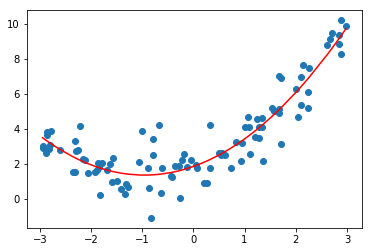

In [70]:
plt.scatter(X,y)
plt.plot(np.sort(x),y_pridect[np.argsort(x)],color='r')
plt.show()